In [29]:
import csv
import numpy as np

with open('data.csv') as file:
    datareader=csv.reader(file,delimiter=',')
    data_x = []
    data_y = []
    for row in datareader:
        data_x.append(row[1:7])
        data_y.append(row[7:])

In [30]:
data_x = np.array(data_x, dtype='f')
data_y = np.array(data_y, dtype='f')

dataset = []
for i in range(917):
    x_and_y = []
    x_and_y.append(data_x[i])
    x_and_y.append(data_y[i]/5.3095255)
    dataset.append(x_and_y)

print(dataset[0])

[array([272.  , 300.  , 286.  , 119.  ,   2.33,   2.5 ], dtype=float32), array([0.32624218], dtype=float32)]


In [31]:
import torch

### Train Test Split

In [32]:
import torch 

train_batch_size = 32
validation_batch_size = 32

train_set, validation_set = torch.utils.data.random_split(dataset, [641, 276])
train_loader = torch.utils.data.DataLoader(train_set, batch_size = train_batch_size, shuffle=True, drop_last=True)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size = validation_batch_size, shuffle=True, drop_last=True)

train_loader = [batch for batch in train_loader]
train_batch_count = len(train_loader)
print("Traning Set Batch Count:",train_batch_count)
print("Training Set Batch Size:",train_batch_size)
    
validation_loader = [batch for batch in validation_loader]
validation_batch_count = len(validation_loader)
print("Validation Set Batch Count:",validation_batch_count)
print("Validation Set Batch Size:",validation_batch_size)

('Traning Set Batch Count:', 20)
('Training Set Batch Size:', 32)
('Validation Set Batch Count:', 8)
('Validation Set Batch Size:', 32)


### Pytorch

In [33]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.beta1 = nn.Linear(6,128)
        self.beta2 = nn.Linear(128,128)
        self.beta3 = nn.Linear(128,1)
        
    def forward(self, X):
        y = self.beta1(X)
        y = F.relu(y)
        y = self.beta2(y)
        y = F.relu(y)
        y = self.beta3(y)
        return y
            
        
model = Net()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

epoch_count = 5000

training_loss_list = []
validation_loss_list = []

for epoch in range(epoch_count):
    
    print("Epoch: ", epoch)
    
    batch_training_loss = 0
    
    for batch_id in range(len(train_loader)):
        X,y = train_loader[batch_id]
        model.train()
        optimizer.zero_grad()
        cikti = model(X).reshape((train_batch_size,1))
        loss = criterion(cikti, y)
        loss.backward()
        optimizer.step()
        batch_training_loss = batch_training_loss + loss
    
    average_train_loss = batch_training_loss / len(train_loader)
    training_loss_list.append(average_train_loss)
    print("Training loss per epoch: ",average_train_loss.item())
    
    batch_validation_loss = 0
    
    for batch_id in range(len(validation_loader)):
        X,y = validation_loader[batch_id]
        with torch.no_grad():
            model.eval()
            cikti = model(X)
            loss = criterion(cikti, y)
            batch_validation_loss += loss.item() 
            
    average_validation_loss = batch_validation_loss / len(validation_loader)
    validation_loss_list.append(average_validation_loss)
    print("Validation loss per epoch: ",average_validation_loss)
    
    print("****************************************************")

('Epoch: ', 0)
('Training loss per epoch: ', 7.013172149658203)
('Validation loss per epoch: ', 3.3460635244846344)
****************************************************
('Epoch: ', 1)
('Training loss per epoch: ', 1.185713529586792)
('Validation loss per epoch: ', 0.6598401293158531)
****************************************************
('Epoch: ', 2)
('Training loss per epoch: ', 0.2843652367591858)
('Validation loss per epoch: ', 0.2493375614285469)
****************************************************
('Epoch: ', 3)
('Training loss per epoch: ', 0.1387050449848175)
('Validation loss per epoch: ', 0.144891862757504)
****************************************************
('Epoch: ', 4)
('Training loss per epoch: ', 0.10543785989284515)
('Validation loss per epoch: ', 0.116271055303514)
****************************************************
('Epoch: ', 5)
('Training loss per epoch: ', 0.09472908079624176)
('Validation loss per epoch: ', 0.10611432418227196)
**********************************

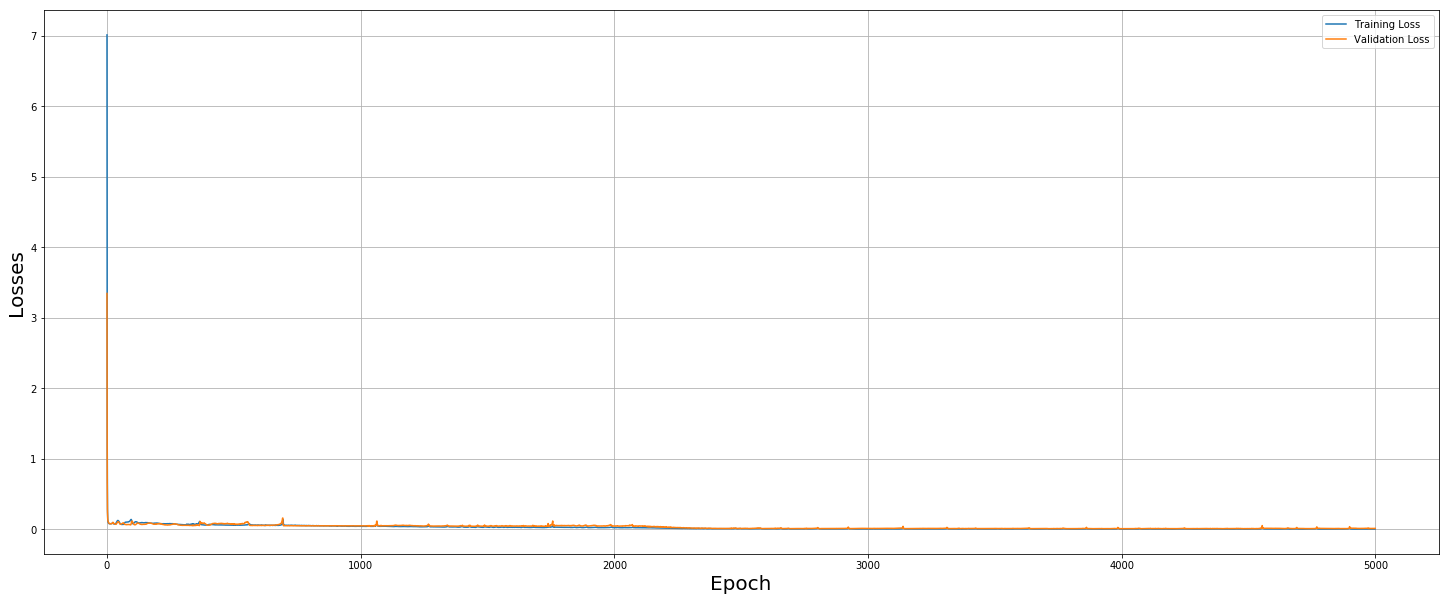

In [38]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

l1, = plt.plot(training_loss_list , label= "Training Loss")
l2, = plt.plot(validation_loss_list, label= "Validation Loss" )


plt.legend(handles=[l1,l2])
plt.xlabel("Epoch", fontsize=20)
plt.ylabel("Losses", fontsize=20)
plt.autoscale(axis='x',tight=False)
plt.grid(True)
plt.show()
